## Data Distribution

변수를 몇 갸의 구간으로 나누어 각 구간별로 몇개의 데이터가 분포되어 있는지를
확인하는 것

### 도수분포(frequencity)

#### 1. 주요개념

용어|의미
|---|---|
계급(Class)|자료가 취하는 전체 범위를 몇개의 소집단으로 나눈 것
도수(frequency)|각 계급에 속하는 자료의 수
상대도수(Relative frequency)|확률로 바꾼 것
도수분포표(Fraquency table)|표


#### 2.도수분포표 예시

In [1]:
import sys
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
D=pd.read_excel('http://data.hossam.kr/D02/ad-sales.xlsx')
data=pd.DataFrame(D)

### 도수분표

##### 1. numpy 이용

In [71]:
hist, bins=np.histogram(data["매출액(억원)"],bins=5)

In [30]:
#마지막은 a~b -> a이상 b 이하 그 외에는 b미만 
index=[]
for i in range(len(bins)-1):
    index.append(f"{bins[i]}~{bins[i+1]}")
idx=pd.Series(index)

In [48]:
A=pd.DataFrame(idx).rename(columns={0:"index"})
B=pd.DataFrame(hist)
result=pd.concat([A,B],axis=1)
result.set_index("index",inplace=True)
result.rename(columns={0:"Frequency"},inplace=True)
result.index.rename("Class",inplace=True)

In [65]:
result

,Frequency
Class,
100.0~418.0,6
418.0~736.0,4
736.0~1054.0,1
1054.0~1372.0,0
1372.0~1690.0,1


#### 2.Pyplot

In [78]:
hist, bins= np.histogram(data["매출액(억원)"],bins=5)

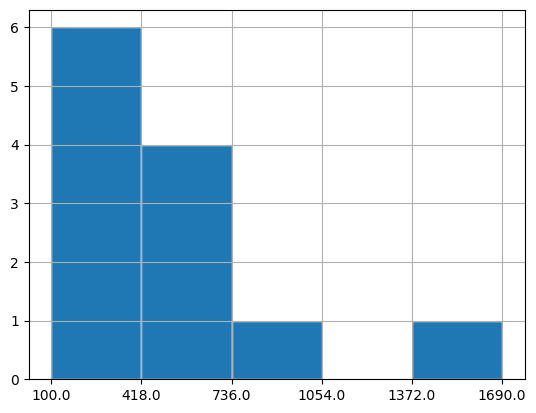

In [83]:
plt.figure()
plt.hist(data=data, x="매출액(억원)",bins=5,edgecolor="White")
plt.grid()
plt.xticks(bins,bins) #자동으로 x축을 설정하기 떄문에 numpy를 이용해 만들었던 bons 대체
plt.show()

#### 3. Seaborn

In [86]:
hist,bins=np.histogram(data["광고비(백만원)"],bins=5)

|파라미터|설명
|---|---|
|kde|확률밀도함수|
|state|"percent"로 지정하면 상대도수|
|hue|범주|

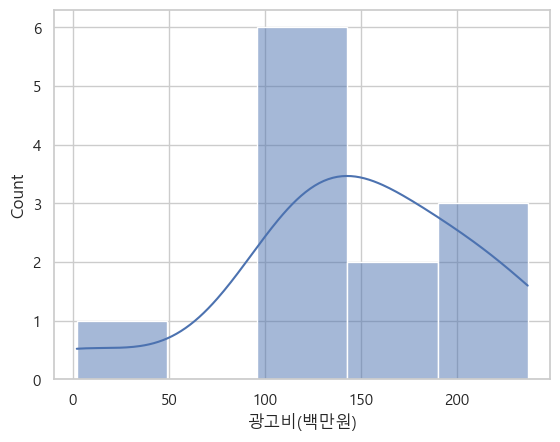

In [94]:
plt.figure()
sb.set_theme(style="whitegrid", font='Malgun Gothic')
sb.histplot(data=data, x='광고비(백만원)',bins=5,kde="percent")
plt.show()

#### 번외.Melt 함수

In [96]:
data2

,월,광고비(백만원),매출액(억원)
0,1월,2,100
1,2월,142,1690
2,3월,122,298
3,4월,130,390
4,5월,185,590
5,6월,121,200
6,7월,101,190
7,8월,199,460
8,9월,221,660
9,10월,139,350


In [99]:
data2=pd.DataFrame(D)
mdf=pd.melt(data2,id_vars=["월"],value_vars=["광고비(백만원)","매출액(억원)"])

In [105]:
mdf

,월,variable,value
0,1월,광고비(백만원),2
1,2월,광고비(백만원),142
2,3월,광고비(백만원),122
3,4월,광고비(백만원),130
4,5월,광고비(백만원),185
5,6월,광고비(백만원),121
6,7월,광고비(백만원),101
7,8월,광고비(백만원),199
8,9월,광고비(백만원),221
9,10월,광고비(백만원),139


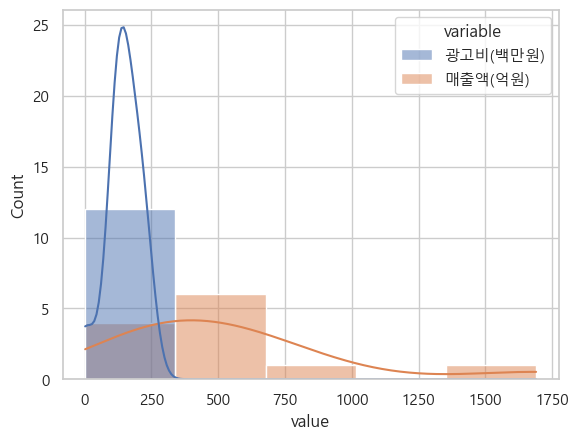

In [112]:
plt.figure()
sb.set_theme(style="whitegrid", font='Malgun Gothic')
sb.histplot(data=mdf,bins=5,kde="percent",hue="variable",x="value")
plt.show()